<a href="https://colab.research.google.com/github/vgarcialopezm/ABC-SMC/blob/main/SIR_BUENO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SIR model**

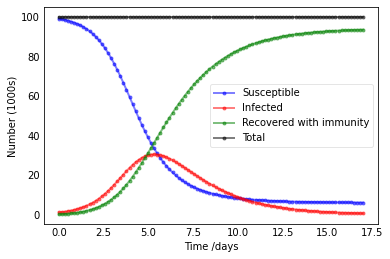

In [ ]:
import numpy as np
from scipy.stats import norm, uniform, multivariate_normal
from scipy.optimize import minimize
from scipy.special import logsumexp
import sys,ast
from random import choices,seed,random
from functools import partial
import os
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as integrate
from scipy.integrate import odeint
import math
# Total population, N.
N = 100
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
E0 = 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

X0=[S0,I0,R0]
#Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
#1/gamma: average infectious period
#beta, gamma = 0.2, 1./10.0
#beta, gamma = 0.7, 1./10.0
betaI, gammaI = 1.5, 0.5

#Birth rate, and death rate
#B, d = 5, 0.005
B, d = 0, 0


# A grid of time points (in days)
finalT = 17.0
t  = np.linspace(0, finalT, 100)
t2 = np.linspace(0, finalT, 10)

# SIR, no latent period, but with reocevered becoming suspitible again
def deriv_SIR(y, t, N, betaI, gammaI):

    '''GOD HORRIBLE HACK, BUT I LIKE DAYS RATHER THAN 1/DAYS'''
    beta = betaI
    gamma = gammaI


    #print betaI, gammaI

    S, I, R = y
    Nt = S + I + R
    dSdt = -beta * S * I / Nt 
    dIdt = beta * S * I / Nt - gamma * I 
    dRdt = gamma * I 
    return [dSdt, dIdt, dRdt]


# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret_SIR = scipy.integrate.odeint(deriv_SIR, y0, t, args=(N, betaI, gammaI))


S, I, R = ret_SIR.T
fig1 = plt.figure(facecolor='w')
#S2, I2, R2 = ret2.T
doAPlot(fig1,t,[S,I,R,S+I+R],['Susceptible','Infected','Recovered with immunity','Total'],line='.-')
#doAPlot(fig2,t,[S2,I2,R2,S2+I2+R2],['Susceptible','Infected','Recovered with immunity','Total'],line='.-')


In [ ]:
epsilons=[60, 50, 40, 20, 10, 5,2,1.5,1,0.5]

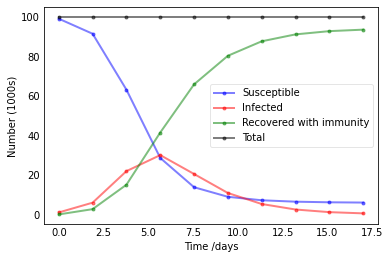

In [ ]:
SIR = scipy.integrate.odeint(deriv_SIR, y0, t2, args=(N, betaI, gammaI))


S, I, R = SIR.T
fig1 = plt.figure(facecolor='w')
#S2, I2, R2 = ret2.T
doAPlot(fig1,t2,[S,I,R,S+I+R],['Susceptible','Infected','Recovered with immunity','Total'],line='.-')
#doAPlot(fig2,t,[S2,I2,R2,S2+I2+R2],['Susceptible','Infected','Recovered with immunity','Total'],line='.-')


In [ ]:
def add_noise(mu,sigma,data):
    noise=np.random.normal(mu,sigma)
    data_noise=data+noise
    return data_noise
print('\n')
data1_noise=add_noise(0,0.5,SIR)

<ipython-input-2-e81bfff16bc4>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)#, axis_bgcolor='#dddddd', axisbelow=True)


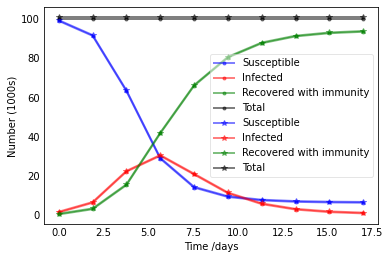

<Figure size 432x288 with 0 Axes>

In [ ]:
S1, I1, R1 = data1_noise.T
fig1 = plt.figure(facecolor='w')
#S2, I2, R2 = ret2.T
plt.figure()
doAPlot(fig1,t2,[S,I,R,S+I+R],['Susceptible','Infected','Recovered with immunity','Total'],line='.-')
doAPlot(fig1,t2,[S1,I1,R1,S1+I1+R1],['Susceptible','Infected','Recovered with immunity','Total'],line='*-')
#doAPlot(fig2,t,[S2,I2,R2,S2+I2+R2],['Susceptible','Infected','Recovered with immunity','Total'],line='.-')
plt.show()

In [ ]:
def doAPlot(fig, t,toPlots,labels,line='-'):

    ax = fig.add_subplot(111)#, axis_bgcolor='#dddddd', axisbelow=True)
    colors = ['b','r','g','k','y']
    for i,toPlot in enumerate(toPlots):
        ax.plot(t, toPlot, colors[i] + line, alpha=0.5, lw=2, label=labels[i])
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    #ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)


In [ ]:
SIR2 = scipy.integrate.odeint(deriv_SIR, y0, t2, args=(N, 2.02, 1.1))
S2,I2,R2=SIR2.T
S2

array([99.        , 90.02422799, 64.93064183, 40.47138649, 30.04738318,
       26.59672935, 25.48443948, 25.12491957, 25.00844315, 24.97067288])

In [ ]:
S

array([99.        , 91.39492054, 63.09284039, 28.5654252 , 13.75198471,
        8.9128022 ,  7.15536438,  6.44176885,  6.1329648 ,  5.99502957])

In [ ]:
S-S2

array([  0.        ,   1.37069255,  -1.83780144, -11.90596128,
       -16.29539847, -17.68392715, -18.32907511, -18.68315072,
       -18.87547835, -18.97564331])

In [ ]:
euc_disti(SIR,data1_noise)

1.328160867426986

In [ ]:
params_SIR = [ # list of parameters used in the lotka volterra model 
    #{'name' : 'alpha', 'lower_limit':0,'upper_limit':10.0},# birth rate
    {'name' : 'beta','lower_limit':0,'upper_limit':10.0},#infection rate
    {'name' : 'gamma','lower_limit':0,'upper_limit':10.0}# recovery rate
    #{'name' : 'd','lower_limit':0,'upper_limit':10.0}# death rate
]

In [ ]:
def euc_disti(data1, data2):
    if np.shape(data1) != np.shape(data2):
        print ("\n the dimensions of the datasets are different (%s v.s. %s)\n" % (len(data1), len(data2)))
        sys.exit()
    else:
        #data2=data2.T
        distance =np.linalg.norm(data1[1]-data2[1])+np.linalg.norm(data1[2]-data2[2])

    if distance < 0:
        return [None]
    else:
        return distance


In [ ]:
def euc_dist(data1, data2):
    if np.shape(data1) != np.shape(data2):
        print ("\n the dimensions of the datasets are different (%s v.s. %s)\n" % (len(data1), len(data2)))
        sys.exit()
    else:
        z =np.array((data1[:,0] - data2[:,0])**2+ (data1[:,1] - data2[:,1])**2)
        print (z)
        distance=np.sum(z)

    if distance < 0:
        return [None]
    else:
        return distance


In [ ]:
def prior():
### Generate a random parameter inside the limits stablished. The shape of the distribution can be changed if required
    prior = []
    for ipar,par in enumerate(params_SIR):
        prior.append(uniform.rvs(loc = par['lower_limit'],
                                 scale = par['upper_limit'])) #par['upper_limit'])) #par['upper_limit']))
        
       
    return prior


In [ ]:
#function that given the values of the parameters, calculates the 

def evaluate_prev_pru(params):
    print('parameters',params)
    l=len(params)
    prior = 1
    for ipar,par in enumerate(params_SIR):
    #for i in range(l):
        prior *= uniform.pdf(params[ipar],loc = par['lower_limit'],
                                 scale = par['upper_limit'])
        if prior==0:
            break   
      #  print('params i', params[i])
       # print('prior',prior)
    return prior


In [ ]:
#function that, given a list of parameters sampled, perturbs it by applying a multivariate normal kernel
def perturb(listaprev,s):
    #print(listaprev)
    lista=np.asarray(listaprev) #.tolist()
    #mean_vec=np.mean(lista)
    cov_matrix=2.0*np.cov(lista.T)  #the covariance matrix for the multivariate normal perturbation kernel is given by this expression
    kernel=multivariate_normal(cov=cov_matrix)
    pert=s+kernel.rvs() # here we obtain the list of perturbed parameters
    pertur=pert.tolist()
    return pertur

In [ ]:
def rk4(f,in_c,t,params):
    #params=[a,b,c,d]
    h=t[1]-t[0]
    n=len(t)
    X  = np.zeros([n,len(in_c)])
    X[0]=in_c
    for i in range(n-1):
        print(params)
        print(X[i])
        k1=f(X[i],t[i],N,*params)
        print(k1)
        k2=f(X[i]+k1*h/2.,t[i]+h/2.,N,*params)
        k3=f(X[i]+k2*h/2.,t[i]+h/2,N,*params)
        k4=f(X[i]+k3*h,t[i]+h,N,*params)
    
        X[i+1]=X[i]+h*(k1/6.+k2/3.+k3/3.+k4/6.)
     
    return X

In [ ]:
#function that gives the denominator used to calculate the weights of every particle.
def weighting(i,j,N,sam,wei,sampre):
     denom=0
     #ker=1
     samprev=np.asarray(sampre)
     cov_matrix=2.0*np.cov(samprev.T)
     kernel=multivariate_normal(cov=cov_matrix)
     for k in range(N):
            #print('sample i j',type(sam[k]),sam[k])
           # print('sample i-1,j',type(sampre[k]),sampre[k])
            sampre[k]=np.array(sampre[k])
            #print('sampre',sampre[k])
            #cov_matrix=2.0*np.cov((sampre[k]).T)  #the covariance matrix for the multivariate normal perturbation kernel is given by this expression
            #print('cov',cov_matrix)
            #kernel=multivariate_normal(cov=cov_matrix)
            # print('wei',wei[i-1,k])
            #print('sam[j]',sam[j])
            #print('sampre[k]',sampre[k])
            ker=kernel.pdf(sam[j]-sampre[k])
            #print('ker',ker)
            #kerne=np.prod(ker)  #here we are obtaining the joint probability of the parameter vector obtained when applying the kernel
            denom+=wei[k]*ker #kerne
            #print('kernel',kernel.cdf(sam[k]-sampre[k]))
     #print('den',denom)      
     return denom


In [ ]:
#function used to normalize the weights
def normalize(wei):
    #normalized=wei/np.linalg.norm(wei)
    normalized=wei/np.sum(wei)
    return normalized  



In [ ]:
def principal(epsilons,listaparametros,N,data1):
   # accepted_distances = np.loadtxt('smc/distances_{}_{}_{}_{}.out'.format(model,sto,gamma,prior_label))
    T=len(epsilons)
    weight=np.zeros((T,N),float)
    dist=np.zeros((T,N),float)
    sample=np.zeros((T,N),list)
    nT=100
    X0=[S0,I0,R0]
    t = np.linspace(0, finalT, 10)
    #t=np.linspace(0.,10,10)
    for i in range(T):
        count=0
        counti=0
        print("SMC step with target distance: {}".format(epsilons[i]))
        if i==0:
            for j in range (N):
                dist[i,j]=epsilons[i]+1
                while dist[i,j]>epsilons[i]:
                    sample[i,j]=prior()
                    print(sample[i,j])
                    #sample[i,j]=np.array(prior())
                    sample[i,j]=np.asarray(sample[i,j])
                    data2= odeint(deriv_SIR, X0, t,args=(nT,*sample[i,j]))
                    #print('data2',data2)
                    #data2=np.array(data2, dtype=np.float64)
                    dist[i,j]=euc_disti(data1,data2)
                    print('distcondata2',dist[i,j])
                count+=1
                print(count)
               
        else:
        
            for j in range (N):
                dist[i,j]=epsilons[i]+1
                while dist[i,j]>epsilons[i]:
                    seed()
                    np.random.seed()
                    choose = choices(sample[i-1,:], weights = weight[i-1,:],k=1)[0] # select a point from the previous sample
                    sample[i,j]=choose
                    #print("before perturb",type(sample[i,j]))
                    #print("before perturb",list(sample[i-1,:]))
                    sample[i,j] = perturb(list(sample[i-1,:]),sample[i,j]) # and perturb it
                    print("after perturb", sample[i,j])
                    #print("after perturb", type(sample[i,j]))
                    evaluation=evaluate_prev_pru(sample[i,j]) 
                    if evaluation>0:
                        data2=odeint(deriv_SIR, X0, t,args=(nT, *sample[i,j]))
                        data2=np.array(data2)
                        #print('data2',data2)
                        dist[i,j]=euc_disti(data1,data2)
                        print('distendata2',dist[i,j])
                    counti+=1
                    print(counti)
        
        for j in range(N):
            if i==0:
                weight[i,j]=1
               # print(weight[i,j])
            else:
                denom=weighting(i,j,N,sample[i,:],weight[i-1,:],list(sample[i-1,:]))
                weight[i,j]=evaluate_prev_pru(sample[i,j])/denom
        #print('weight[i,:]',weight[i,:])
        if i!=0:
           weight[i,:]=normalize(weight[i,:])
           print('weight[i,:] normalized',weight[i,:])
        #pars = np.loadtxt('smc_van/pars_{}.out'.format(i))
        #weights = np.loadtxt('smc_van/weights_{}.out'.format(i))
        #np.savetxt('smc_van/pars_{}.out'.format(i), sample[T-1,:])
        #np.savetxt('smc_van/weights_{}.out'.format(i), weight[T-1,:])
      #  np.savetxt('smc/distances_{}.out'.format(label), accepted_distances)
    #print('sample',sample[T-1,N-1])
    #print('weight',weight[T-1])
    print('dist',dist[T-1])
    return sample, weight, dist,data2


In [ ]:
print(SIR)

[[99.          1.          0.        ]
 [91.39492054  5.94074788  2.66433158]
 [63.09284039 21.89007449 15.01708512]
 [28.5654252  30.00381475 41.43076005]
 [13.75198471 20.45012508 65.79789021]
 [ 8.9128022  10.83282513 80.25437266]
 [ 7.15536438  5.26938437 87.57525126]
 [ 6.44176885  2.4810077  91.07722345]
 [ 6.1329648   1.1523158  92.7147194 ]
 [ 5.99502957  0.53199881 93.47297162]]


In [ ]:
sample,weight,dist,data2=principal(epsilons,params_SIR,100,SIR)

SMC step with target distance: 60
[0.5271606626616554, 5.776293790170928]
distcondata2 53.91577412325327
1
[0.009079977980861464, 0.9797373991273328]
distcondata2 54.031264455608124
2
[7.611223106890085, 1.002693416314543]
distcondata2 218.0612250338056
[3.3032175180143075, 6.2655282118478315]
distcondata2 51.967374290778245
3
[3.1030737219577276, 5.798468942433459]
distcondata2 51.90315744515815
4
[2.1573299056896023, 9.693479496424382]
distcondata2 53.541499229130515
5
[7.571009630383142, 1.891104033911255]
distcondata2 222.66478345495284
[9.633543497862565, 4.355579691675962]
distcondata2 195.71053396858014
[7.264785953179993, 0.4952555068418707]
distcondata2 201.1799769104304
[1.904527087557727, 4.308076695993918]
distcondata2 52.56127137756002
6
[5.57631854623831, 9.847626934114524]
distcondata2 51.628838646567985
7
[8.658941307214057, 9.227588032665446]
distcondata2 43.948418359958374
8
[2.7024097708987274, 5.457089999106085]
distcondata2 52.210954586349246
9
[2.034956745980838, 

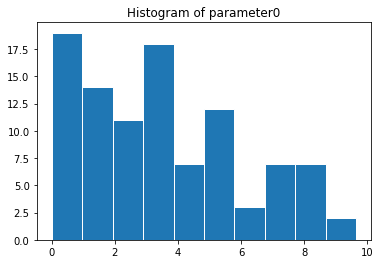

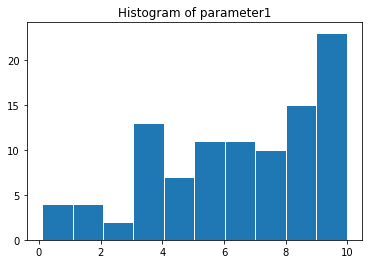

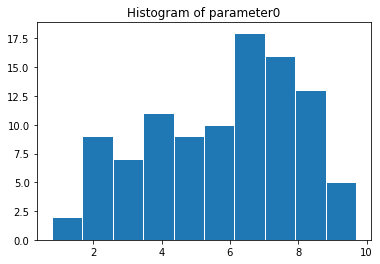

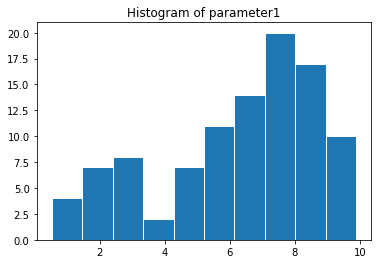

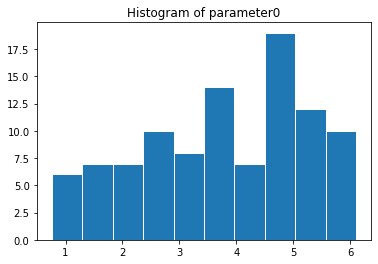

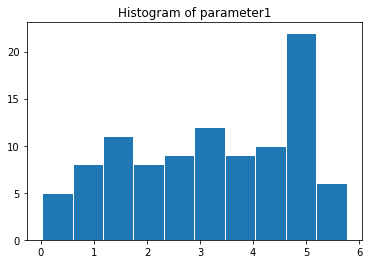

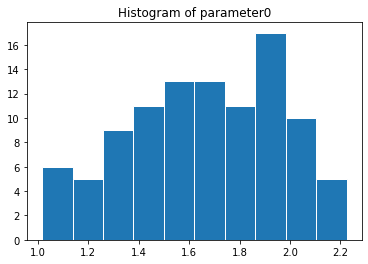

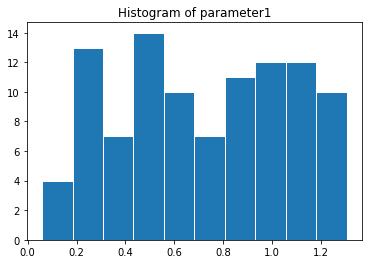

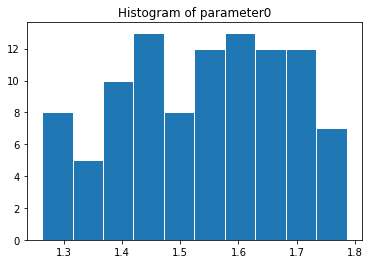

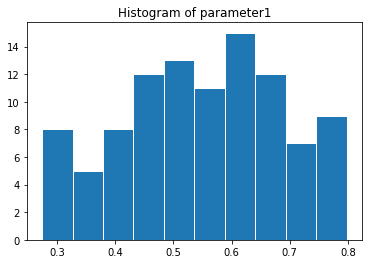

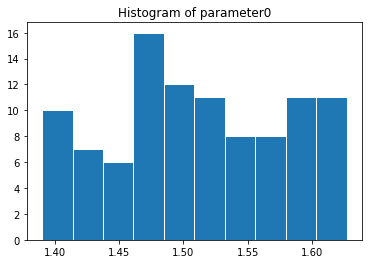

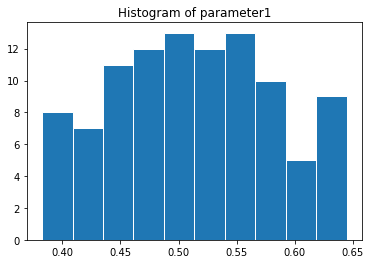

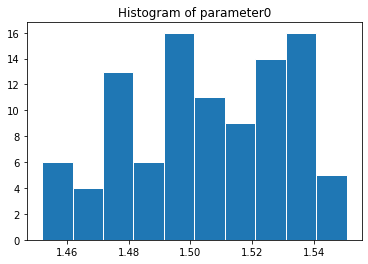

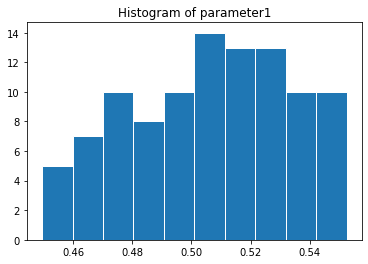

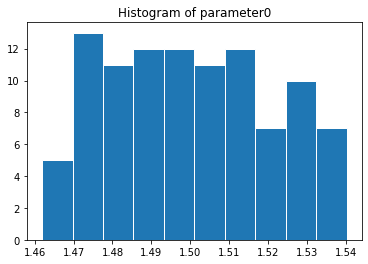

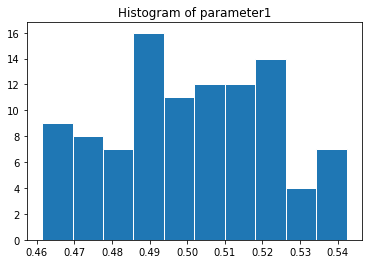

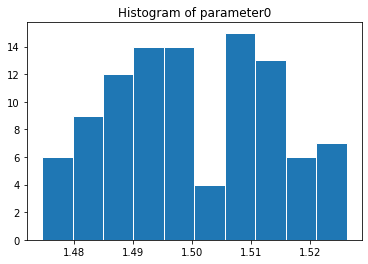

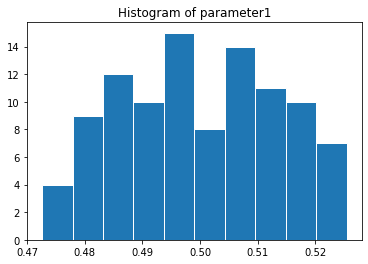

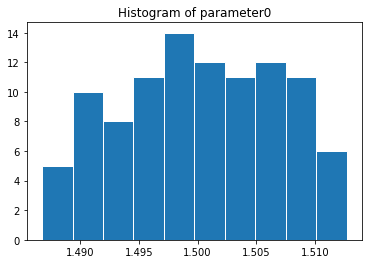

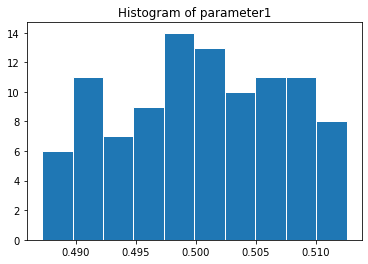

In [ ]:
for t in range(len(epsilons)):
    for j in range(len(params_SIR)):
        plt.figure()
        b=[]
        for i in sample[t,:]:
            b.append(i[j])
        al=np.histogram(b)
        n,bins,patches=plt.hist(b,edgecolor='white')
        plt.title('Histogram of parameter'+str(j))
    plt.show()
plt.show()

<Figure size 432x288 with 0 Axes>

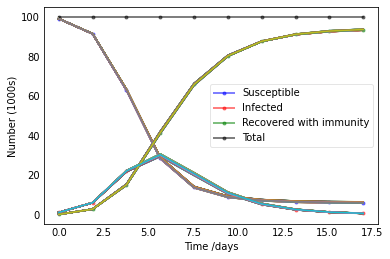

In [ ]:
plt.figure()
fig1 = plt.figure(facecolor='w')
doAPlot(fig1,t2,[S,I,R,S+I+R],['Susceptible','Infected','Recovered with immunity','Total'],line='.-')
for i in sample[-1,:]:
    data=odeint(deriv_SIR, X0, t2,args=(N, *i))
    S1, I1, R1 =data.T
    plt.plot(t2,S1)
    plt.plot(t2,R1)
    plt.plot(t2,I1)
    #plt.show()
plt.show()

<ipython-input-45-e81bfff16bc4>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)#, axis_bgcolor='#dddddd', axisbelow=True)


<Figure size 432x288 with 0 Axes>

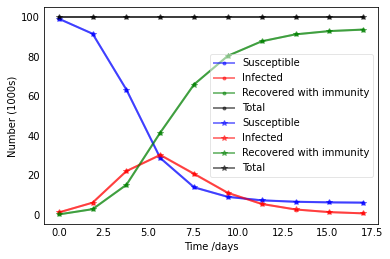

In [ ]:
plt.figure()
fig1 = plt.figure(facecolor='w')
doAPlot(fig1,t2,[S,I,R,S+I+R],['Susceptible','Infected','Recovered with immunity','Total'],line='.-')
data_NEW=odeint(deriv_SIR, X0, t2,args=(N,*sample[7,12]))
SN, IN, RN =data.T
doAPlot(fig1,t2,[SN,IN,RN,SN+IN+RN],['Susceptible','Infected','Recovered with immunity','Total'],line='*-')
plt.show()

In [ ]:
mindis=np.min(dist[-1,:])
mindis

0.024391843809122776

In [ ]:
np.where(dist ==mindis )

(array([9]), array([12]))

In [ ]:
sample[9,12]

[1.4996163693385132, 0.4998150410360696]